In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#https://www.kaggle.com/datasets/zahranusrat/lifestyle-and-health-risk-prediction-dataset
# Load the dataset from a CSV file into a pandas DataFrame
df=pd.read_csv("Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv")

In [83]:
# Preview the first 5 rows of the DataFrame to check data loading and structure
df.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


In [84]:
# EDA (Exploratory Data Analysis)

In [85]:
# Display summary information about the DataFrame, including column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


In [86]:

df.columns

Index(['age', 'weight', 'height', 'exercise', 'sleep', 'sugar_intake',
       'smoking', 'alcohol', 'married', 'profession', 'bmi', 'health_risk'],
      dtype='object')

In [87]:
# Show the count of each unique value in the 'profession' column to analyze profession distribution
df["profession"].value_counts()

profession
student          644
farmer           639
driver           631
doctor           630
artist           626
engineer         616
teacher          612
office_worker    602
Name: count, dtype: int64

In [88]:
# Check missing values in each column
df.isnull().sum()

age             0
weight          0
height          0
exercise        0
sleep           0
sugar_intake    0
smoking         0
alcohol         0
married         0
profession      0
bmi             0
health_risk     0
dtype: int64

In [89]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [90]:
# Get summary statistics for numerical columns
df.describe()

,age,weight,height,sleep,bmi
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,48.805600,77.359200,171.933200,6.997060,26.84388
std,17.906991,18.714567,15.822225,1.432849,8.25249
min,18.000000,45.000000,145.000000,3.000000,11.40000
25%,34.000000,61.000000,158.000000,6.000000,20.30000
50%,49.000000,77.000000,171.500000,7.000000,26.00000
75%,64.000000,94.000000,186.000000,8.000000,32.40000
max,79.000000,109.000000,199.000000,10.000000,51.40000


In [91]:
df["profession"].value_counts()

profession
student          644
farmer           639
driver           631
doctor           630
artist           626
engineer         616
teacher          612
office_worker    602
Name: count, dtype: int64

In [92]:
cols=['age', 'weight', 'height', 'exercise', 'sleep', 'sugar_intake',
       'smoking', 'alcohol', 'married', 'profession', 'bmi', 'health_risk']

for col in cols:
    print(df[col].value_counts())
    

age
77    102
52    101
66     99
79     95
64     95
     ... 
65     63
44     62
24     60
48     59
60     58
Name: count, Length: 62, dtype: int64
weight
98     98
102    98
61     96
103    90
70     90
       ..
78     64
52     63
58     60
51     59
49     53
Name: count, Length: 65, dtype: int64
height
157    119
160    113
192    111
188    109
161    108
170    105
197    102
167    101
152     99
163     99
158     98
173     98
191     96
168     96
166     95
146     94
177     94
196     94
150     93
180     93
171     93
181     93
195     92
198     92
151     92
189     91
185     91
165     91
172     90
183     89
182     89
148     89
147     89
186     89
194     89
154     88
162     88
159     87
187     87
184     87
156     86
149     86
175     85
179     85
164     83
153     82
199     82
169     81
174     81
145     80
176     80
190     72
178     71
193     68
155     65
Name: count, dtype: int64
exercise
medium    1985
low       1272
high      1000
n

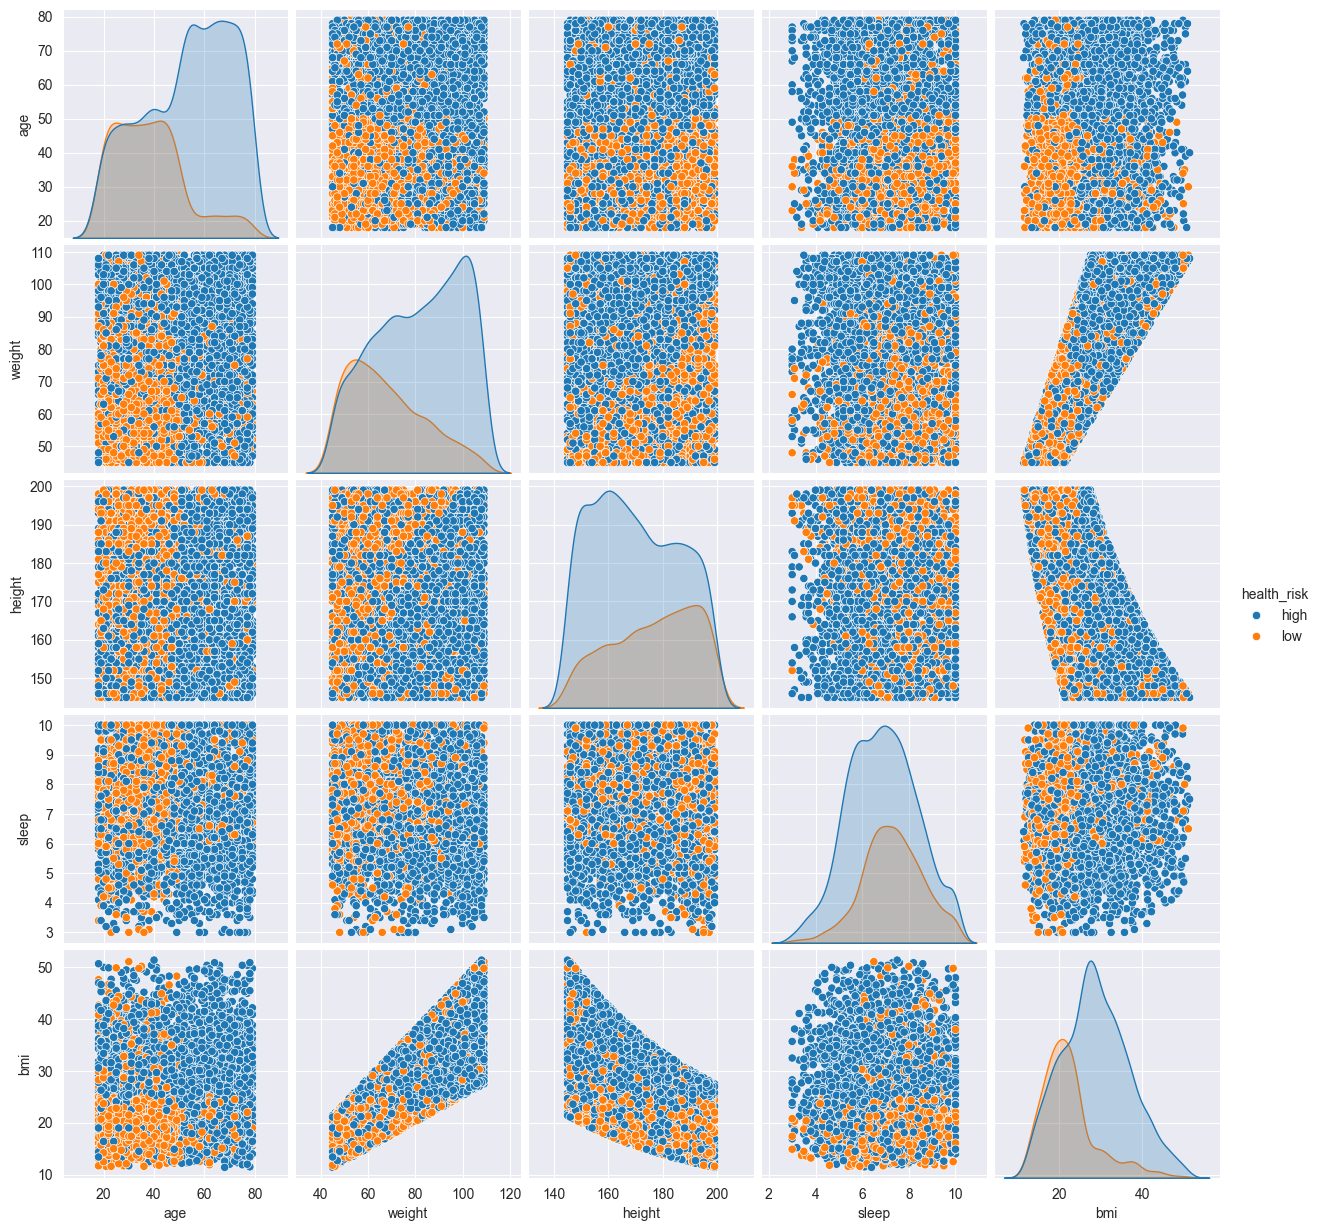

In [93]:
# Visualize pairwise relationships between features, colored by health risk
sns.pairplot(df, hue="health_risk")
plt.show()

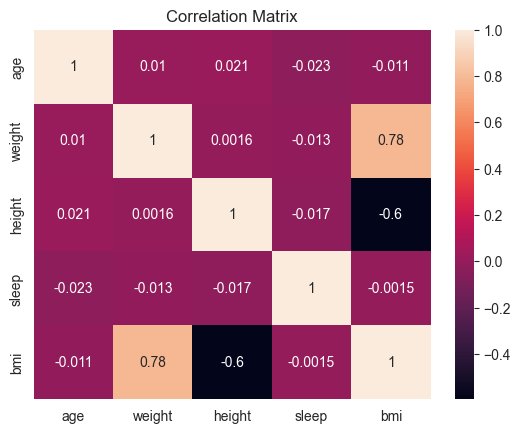

In [94]:
# Display a heatmap of the correlation matrix for numerical features
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [95]:
# Feature Engineering

In [96]:
# Separate features from the target variable
X= df.drop("health_risk", axis=1)
# Define the target variable
y=df["health_risk"]

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
# Split the data into training and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [99]:
X_train.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi
4016,39,48,150,high,5.1,medium,no,no,yes,engineer,21.3
569,61,104,151,high,4.0,high,no,no,no,teacher,45.6
460,61,106,151,low,8.5,medium,yes,no,no,farmer,46.5
2077,70,69,172,medium,7.6,high,no,yes,yes,farmer,23.3
1727,38,61,178,medium,8.5,medium,no,yes,no,doctor,19.3


In [100]:
X_test.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi
1970,32,79,163,medium,5.5,high,yes,yes,yes,doctor,29.7
3543,75,55,168,medium,6.5,low,no,no,no,teacher,19.5
3132,75,68,145,medium,6.3,low,no,no,yes,teacher,32.3
2823,50,48,187,medium,5.1,high,no,no,yes,student,13.7
2682,22,85,165,low,6.9,medium,no,no,yes,office_worker,31.2


In [101]:
#Encoders

In [102]:
# Initialize a dictionary to store encoding maps.
encoders={}

In [103]:
# Encode the "health_risk" target column as binary values for model training and testing
y_values = {'low': 0, 'high': 1} 
y_train_encoded = y_train.map(y_values)
y_test_encoded = y_test.map(y_values)
encoders['target'] = y_values

In [104]:
# Encode ordinal categorical columns (exercise, sugar_intake) with integer values for model training
ordinal_cols = {
    'exercise': {'none': 0, 'low': 1, 'medium': 2, 'high': 3},
    'sugar_intake': {'low': 0, 'medium': 1, 'high': 2},
    }

for col, mapping in ordinal_cols.items():
    encoders[col]=mapping
    X_train[col] = X_train[col].map(mapping)
    X_test[col] = X_test[col].map(mapping)
print(encoders)

{'target': {'low': 0, 'high': 1}, 'exercise': {'none': 0, 'low': 1, 'medium': 2, 'high': 3}, 'sugar_intake': {'low': 0, 'medium': 1, 'high': 2}}


In [105]:
X_train.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi
4016,39,48,150,3,5.1,1,no,no,yes,engineer,21.3
569,61,104,151,3,4.0,2,no,no,no,teacher,45.6
460,61,106,151,1,8.5,1,yes,no,no,farmer,46.5
2077,70,69,172,2,7.6,2,no,yes,yes,farmer,23.3
1727,38,61,178,2,8.5,1,no,yes,no,doctor,19.3


In [106]:
# Encode categorical columns (smoking, alcohol, married ) as binary values for model training and testing
binary_cols = ['smoking', 'alcohol', 'married']
binary_mapping = {'yes': 1, 'no': 0}
for col in binary_cols:
    encoders[col]=binary_mapping
    X_train[col] = X_train[col].map(binary_mapping)
    X_test[col] = X_test[col].map(binary_mapping)
print(encoders)

{'target': {'low': 0, 'high': 1}, 'exercise': {'none': 0, 'low': 1, 'medium': 2, 'high': 3}, 'sugar_intake': {'low': 0, 'medium': 1, 'high': 2}, 'smoking': {'yes': 1, 'no': 0}, 'alcohol': {'yes': 1, 'no': 0}, 'married': {'yes': 1, 'no': 0}}


In [107]:
X_train.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi
4016,39,48,150,3,5.1,1,0,0,1,engineer,21.3
569,61,104,151,3,4.0,2,0,0,0,teacher,45.6
460,61,106,151,1,8.5,1,1,0,0,farmer,46.5
2077,70,69,172,2,7.6,2,0,1,1,farmer,23.3
1727,38,61,178,2,8.5,1,0,1,0,doctor,19.3


In [108]:
# One-Hot Encode the categorical "profession" column with integer values for model training
profession_col = ['profession']
X_train = pd.get_dummies(X_train, columns=profession_col, drop_first=True)
X_test = pd.get_dummies(X_test, columns=profession_col, drop_first=True)

missing_cols = set(X_train.columns) - set(X_test.columns)
for c in missing_cols:
    X_test[c] = 0
X_test = X_test[X_train.columns]

In [109]:
X_test.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,bmi,profession_doctor,profession_driver,profession_engineer,profession_farmer,profession_office_worker,profession_student,profession_teacher
1970,32,79,163,2,5.5,2,1,1,1,29.7,True,False,False,False,False,False,False
3543,75,55,168,2,6.5,0,0,0,0,19.5,False,False,False,False,False,False,True
3132,75,68,145,2,6.3,0,0,0,1,32.3,False,False,False,False,False,False,True
2823,50,48,187,2,5.1,2,0,0,1,13.7,False,False,False,False,False,True,False
2682,22,85,165,1,6.9,1,0,0,1,31.2,False,False,False,False,True,False,False


In [110]:
# Store the final list of features for the model.
all_features=X_train.columns
all_features

Index(['age', 'weight', 'height', 'exercise', 'sleep', 'sugar_intake',
       'smoking', 'alcohol', 'married', 'bmi', 'profession_doctor',
       'profession_driver', 'profession_engineer', 'profession_farmer',
       'profession_office_worker', 'profession_student', 'profession_teacher'],
      dtype='object')

In [111]:
# The final maps of encoders
encoders

{'target': {'low': 0, 'high': 1},
 'exercise': {'none': 0, 'low': 1, 'medium': 2, 'high': 3},
 'sugar_intake': {'low': 0, 'medium': 1, 'high': 2},
 'smoking': {'yes': 1, 'no': 0},
 'alcohol': {'yes': 1, 'no': 0},
 'married': {'yes': 1, 'no': 0}}

In [112]:
# Import StandardScaler for features scaling.
from sklearn.preprocessing import StandardScaler

In [113]:
# Initialize the StandardScaler object.
scaler = StandardScaler()

In [114]:
# Fit and transform (scale) the training and test data.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
# Import the RandomForest model and necessary metrics.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [116]:
# Initialize the RandomForest Classifier model.
model_rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=5,              
    min_samples_leaf=5,       
    random_state=15, 
    n_jobs=-1
)
# Train the ML model with the scaled training data.
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=15)

In [117]:
# Make predictions on the scaled test data.
y_pred=model_rf.predict(X_test_scaled)
print("score :",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

score : 0.9113333333333333
[[1032   15]
 [ 118  335]]
              precision    recall  f1-score   support

        high       0.90      0.99      0.94      1047
         low       0.96      0.74      0.83       453

    accuracy                           0.91      1500
   macro avg       0.93      0.86      0.89      1500
weighted avg       0.92      0.91      0.91      1500



In [118]:
# Model saving section.

In [119]:
#https://docs.python.org/3/library/pickle.html
# Import the pickle library to save the model objects.
import pickle

In [120]:
# Save the complete model, encoders, and scaler to a .pkl file.
with open("health_risk_complete.pkl", "wb") as f:
    pickle.dump({
        "model":model_rf,
        "encoders":encoders,
        "scaler":scaler,
        "all_features":all_features
    },f)